# PSB injection bump in Xsuite - track!

In [1]:
%matplotlib notebook

In [2]:
# Import modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import xtrack as xt
import xpart as xp
import xdeps as xd

from cpymad.madx import Madx

/Users/giadarol/xsuite_packages/xtrack/xtrack/progress_indicator.py:90: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


###  Load line from previous notebook

In [3]:
# Reload
line = xt.Line.from_json('psb_05_thin.json')
line.build_tracker()
tw = line.twiss()

line.vars['t_turn_s'] = 0 # avoid leftovers from previous scripts

Loading line from dict:   0%|          | 0/2396 [00:00<?, ?it/s]

Done loading line from dict.           
Found suitable prebuilt kernel `default_only_xtrack`.
Found suitable prebuilt kernel `only_xtrack_frozen_energy`.


### Enable chicane and chicane correction

In [4]:
line.vars['on_chicane_k0'] = 1
line.vars['on_chicane_k2'] = 1
line.vars['on_chicane_beta_corr'] = 1
line.vars['on_chicane_tune_corr'] = 1

### Install monitor at foil

In [5]:
num_turns = 10000

monitor = xt.ParticlesMonitor(start_at_turn=0, stop_at_turn=num_turns, particle_id_range=(0,50))

line.discard_tracker()
line.insert_element(index='bi1.tstr1l1', element=monitor, name='monitor_at_foil')
line.build_tracker()

Found suitable prebuilt kernel `default_only_xtrack`.


### Generate some test particles

In [6]:
line.vars['t_turn_s'] = 0.
p = line.build_particles(zeta=np.linspace(-45, 45, 50))

### Enable time-dependent variables (update `t_turn_s` automatically during tracking)

In [7]:
line.enable_time_dependent_vars = True
# line.dt_update_time_dependent_vars = 3e-6
line.vars.cache_active = True
line.vars['t_turn_s'] = 0.

In [8]:
print('Tracking...')
line.track(p, num_turns=num_turns, time=True, with_progress=True)
print(f'Done in {line.time_last_track:.4} s')

Tracking...


Tracking:   0%|          | 0/10000 [00:00<?, ?it/s]

Done in 45.98 s


<IPython.core.display.Javascript object>


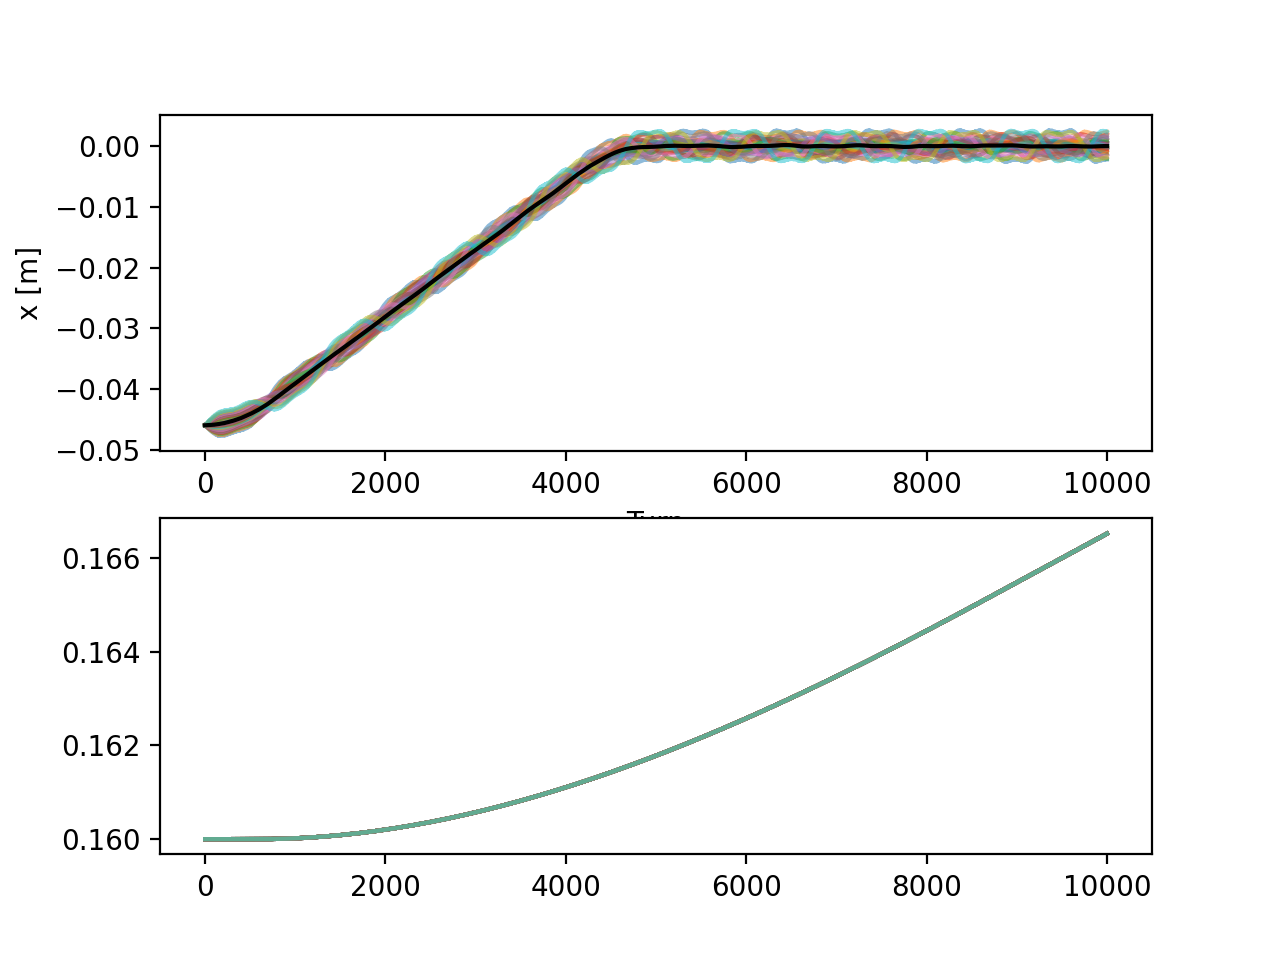

In [9]:
import matplotlib.pyplot as plt
plt.close('all')
plt.figure(1)
sp1 = plt.subplot(2,1,1)
plt.plot(monitor.x.T, alpha=0.5)
plt.plot(np.mean(monitor.x, axis=0), color='k')
plt.xlabel('Turn')
plt.ylabel('x [m]')
plt.subplot(2,1,2, sharex=sp1)
plt.plot(1e-9 * xt.PROTON_MASS_EV * (monitor.gamma0.T - 1), alpha=0.5)
plt.show()

<IPython.core.display.Javascript object>


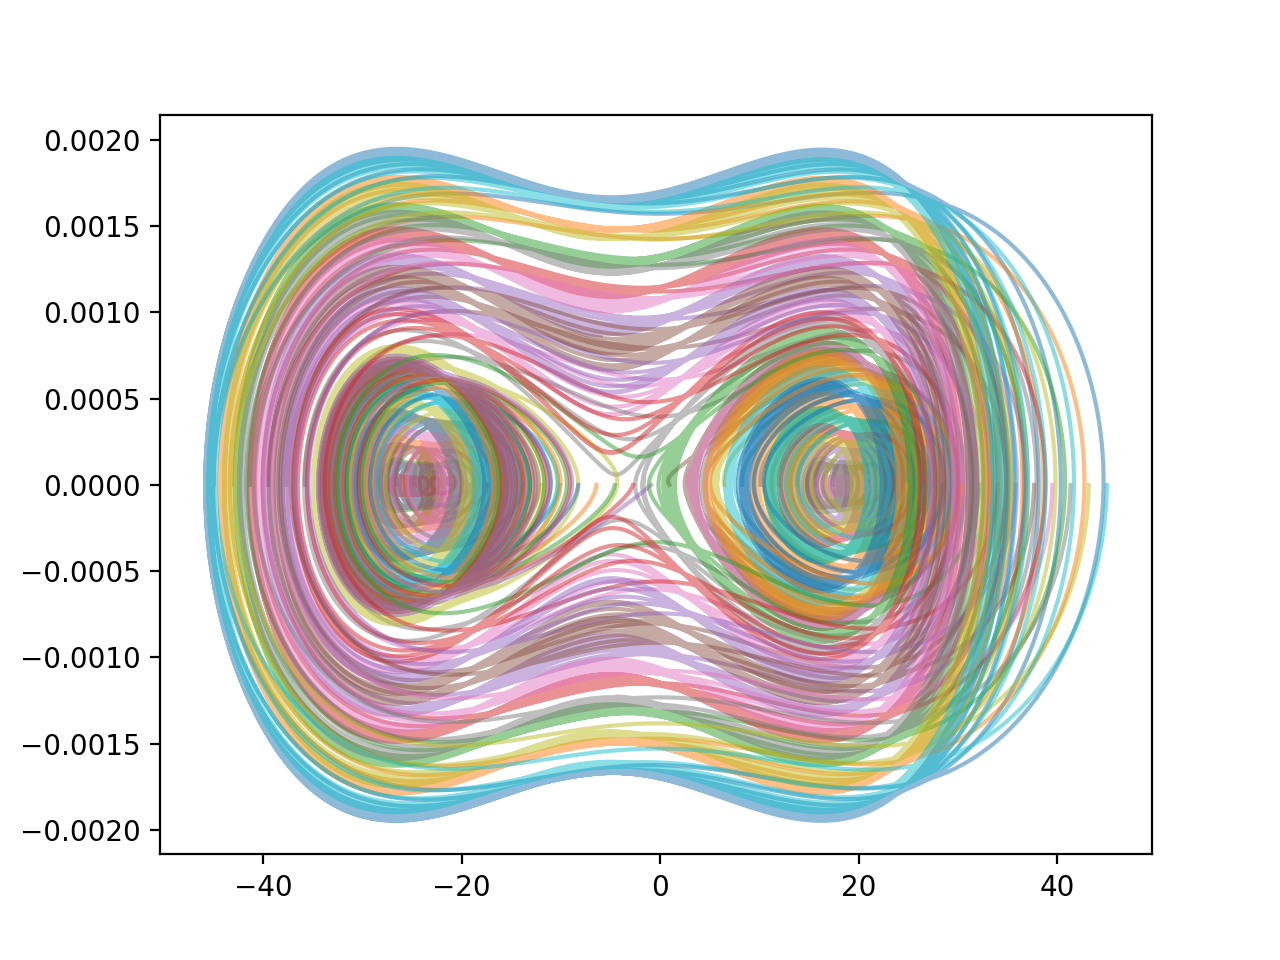

In [10]:
plt.figure(100)
plt.plot(monitor.zeta.T, monitor.delta.T, alpha=0.5)

In [13]:
from scipy.constants import c as clight
i_turn_test = np.arange(num_turns)
t_turn = line.energy_program.get_t_s_at_turn(i_turn_test)
t_turn_constant_energy = i_turn_test * line.get_length()/clight/beta_expected[0]
plt.plot(i_turn_test, 1e6 * (t_turn - t_turn_constant_energy))

NameError: name 'clight' is not defined

-------